<a href="https://colab.research.google.com/github/aditiaropalli/Study_Notes/blob/main/Threading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multithreading

### Process

1.   Excecutable program
2.   Associated data (variables, workspace, buffers)
3. Excecution context/state

### Thread

- Smallest unit of processing performed in OS
- Sequence of instructions within program which can be excecuted independently
- Thread contains all information in **Thread Control Block (TCB)**

  - thread identifier
  - stack ptr - thread's stack(local variables in scope)
  - program counter - address of instruction being currently executed
  - thread state - running/ready/waiting/starting/done
  - thread register set
  - parent process pointer - points to process control block that thread lives on

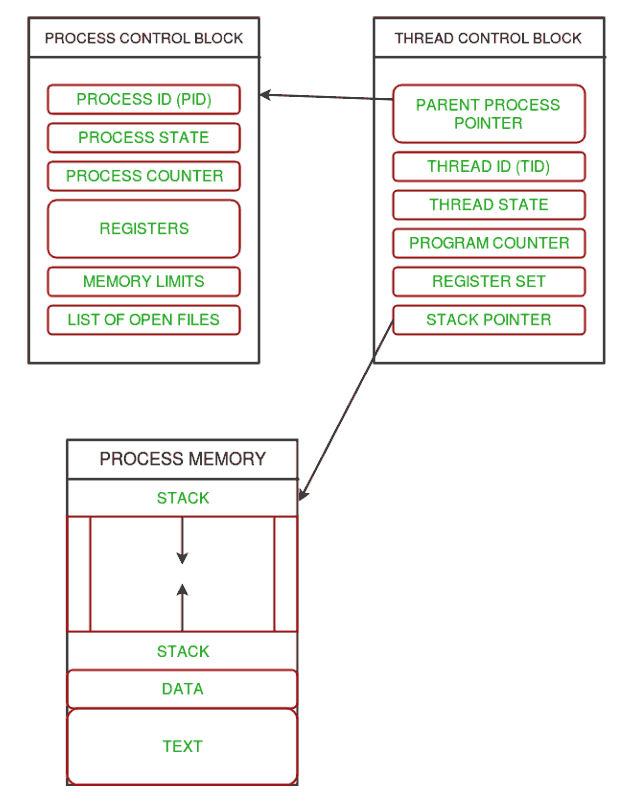

Multiple threads can exist when each thread has its own register set, local variables, all threads share global variables ( stored in the heap )
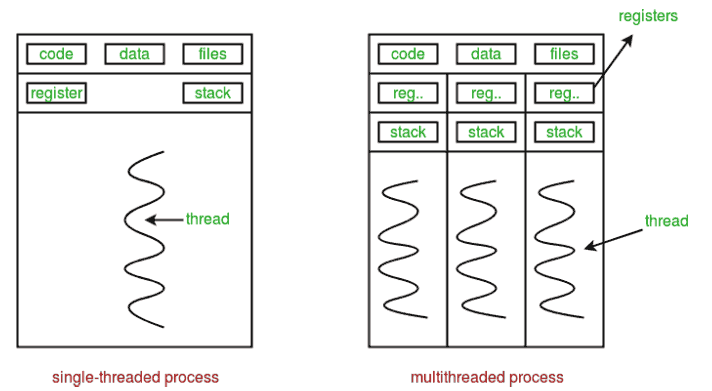

# Examples

In [2]:
def cube(n):
  print(f"Cube : {n*n*n}")

def sq(n):
  print(f"Square : {n*n}")

In [3]:
import threading

t1 = threading.Thread(target = cube, args = (10, ))
t2 = threading.Thread(target= sq, args = (10,))

t1.start()
t2.start()

# in order to stop the execution of current program till thread is complete, join() method is used
t1.join()
t2.join()

print("Done")


Cube : 1000
Square : 100
Done


###  Functions

1. os.getpid() : gets current process id
2. threading.main_thread() : function to get main thread object
3. threading.current_thread()



In [5]:
# import threading
import os

def task1():
  print(f"Task 1 assigned to thread: {threading.current_thread().name}")
  print(f"Task 1 running on process: {os.getpid()}")

def task2():
  print(f"Task 2 assigned to thread: {threading.current_thread().name}")
  print(f"Task 2 running on process: {os.getpid()}")

# if __name__ == "__main__":

print(f"ID of process running in main : {os.getpid()}")

print(f"Main thread name: {threading.current_thread().name}")

t1 = threading.Thread(target=task1)
t2 = threading.Thread(target=task2)

t1.start()
t2.start()

t1.join()
t2.join()

print("Done")

ID of process running in main : 782
Main thread name: MainThread
Task 1 assigned to thread: Thread-14 (task1)
Task 1 running on process: 782
Task 2 assigned to thread: Thread-15 (task2)
Task 2 running on process: 782
Done


### Threadpool

Threadpool is collection of threads created in advance to be reused in multiple tasks.
- concurrent.futures module : ThreadPoolExecutor class to create and
 manage thread pool
  1. create ThreadPoolExecutor
  2. set max worker threads
  3. shutdown() method to wait for all tasks to complete before main thread continues

* take care of race conditions
* deadlocks

``` concurrent.futures.ThreadPoolExecutor ```

``` pool.shutdown(wait = True) ```


In [6]:
import concurrent.futures

def worker():
  print("Worker thread running")

def worker2():
  print("Worker2 thread running")

pool = concurrent.futures.ThreadPoolExecutor(max_workers = 2)

pool.submit(worker)
pool.submit(worker2)

pool.shutdown(wait = True)

print("Main thread continuing to run")

Worker thread running
Worker2 thread running
Main thread continuing to run


## FAQs

- Multithreading is running multiple threads concurrently within single process to get parellelism and use multiple CPU cores

- Py good for i/o bound tasks due to Global Interpreter Lock (GIL) - this limits the execution of one thread at a time when CPU bound task

- 'Threading' module used
- practical max thread number determined by GIL, resources and performance constraints. For intensive tasks, multiprocessing is preferred

### Types of threads

1. **Main Thread** : initial execution thread when program starts
2. **Daemon Thread** : background threads that terminate when the main thread terminates
3. **Non Daemon Thread** : Threads that continue until task completed, even if main thread exits